In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from models import *
from plot_utils import *

/Users/fabuzaid21/.virtualenvs/fomo/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6.5)
plt.rcParams['font.size'] = 22
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17
plt.rcParams['legend.fontsize'] = 21
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 4

sns.set_style('ticks')
sns.set_palette('Paired', 10)

In [3]:
simdex_netflix_df = pd.read_csv('timing-results/netflix-simdex-timing.csv')
lemp_netflix_df = pd.read_csv('timing-results/netflix-lemp-timing.csv')
blocked_mm_netflix_df = pd.read_csv('timing-results/netflix-blocked_mm-timing.csv')

simdex_kdd_df = pd.read_csv('timing-results/kdd-simdex-timing.csv')
lemp_kdd_df = pd.read_csv('timing-results/kdd-lemp-timing.csv')
blocked_mm_kdd_df = pd.read_csv('timing-results/kdd-blocked_mm-timing.csv')

simdex_r2_df = pd.read_csv('timing-results/r2-simdex-timing.csv')
lemp_r2_df = pd.read_csv('timing-results/r2-lemp-timing.csv')
blocked_mm_r2_df = pd.read_csv('timing-results/r2-blocked_mm-timing.csv')

simdex_interpolation_df = pd.read_csv('timing-results/interpolation-simdex.csv')
lemp_interpolation_df = pd.read_csv('timing-results/interpolation-lemp.csv')
blocked_mm_interpolation_df = pd.read_csv('timing-results/interpolation-blocked_mm.csv')

simdex_df = pd.concat([simdex_netflix_df, simdex_kdd_df, simdex_r2_df])
lemp_df = pd.concat([lemp_netflix_df, lemp_kdd_df, lemp_r2_df])
blocked_mm_df = pd.concat([blocked_mm_netflix_df, blocked_mm_kdd_df, blocked_mm_r2_df])

plot_utils.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  simdex_result['reg'] = reg
plot_utils.py:368: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  blocked_mm_result['reg'] = 'Blocked MM Only'
/Users/fabuzaid21/.virtualenvs/fomo/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


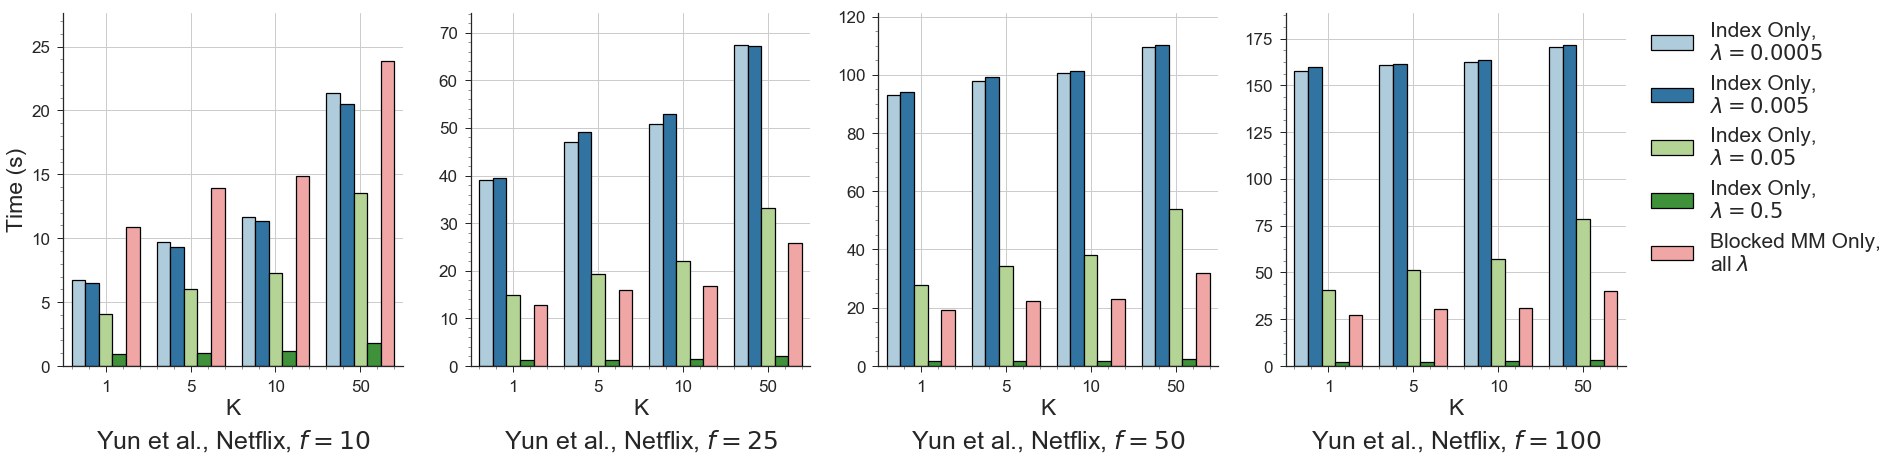

In [4]:
reg_vs_runtime(simdex_netflix_df, blocked_mm_netflix_df,
               ['nomad-Netflix-10', 'nomad-Netflix-25', 'nomad-Netflix-50', 'nomad-Netflix-100'],
               NETFLIX_REGS, fname='Netflix', nrows=1)

plot_utils.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  blocked_mm_rt['algo'] = 'Blocked MM Only'
plot_utils.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lemp_rt['algo'] = 'LEMP'


lemp-paper-Netflix-noav-50
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: comp_time, dtype: float64
nomad-Netflix-50-reg-0.05
72    NaN
73    NaN
74    NaN
75    NaN
132   NaN
133   NaN
134   NaN
135   NaN
Name: comp_time, dtype: float64
lemp-paper-KDD-50
0    13.434904
1    15.394163
2    15.197624
3    12.998408
Name: comp_time, dtype: float64
nomad-KDD-50-reg-1
56   NaN
57   NaN
58   NaN
59   NaN
72   NaN
73   NaN
74   NaN
75   NaN
Name: comp_time, dtype: float64
nomad-R2-50-reg-0.001
48    NaN
49    NaN
50    NaN
51    NaN
188   NaN
189   NaN
190   NaN
191   NaN
Name: comp_time, dtype: float64


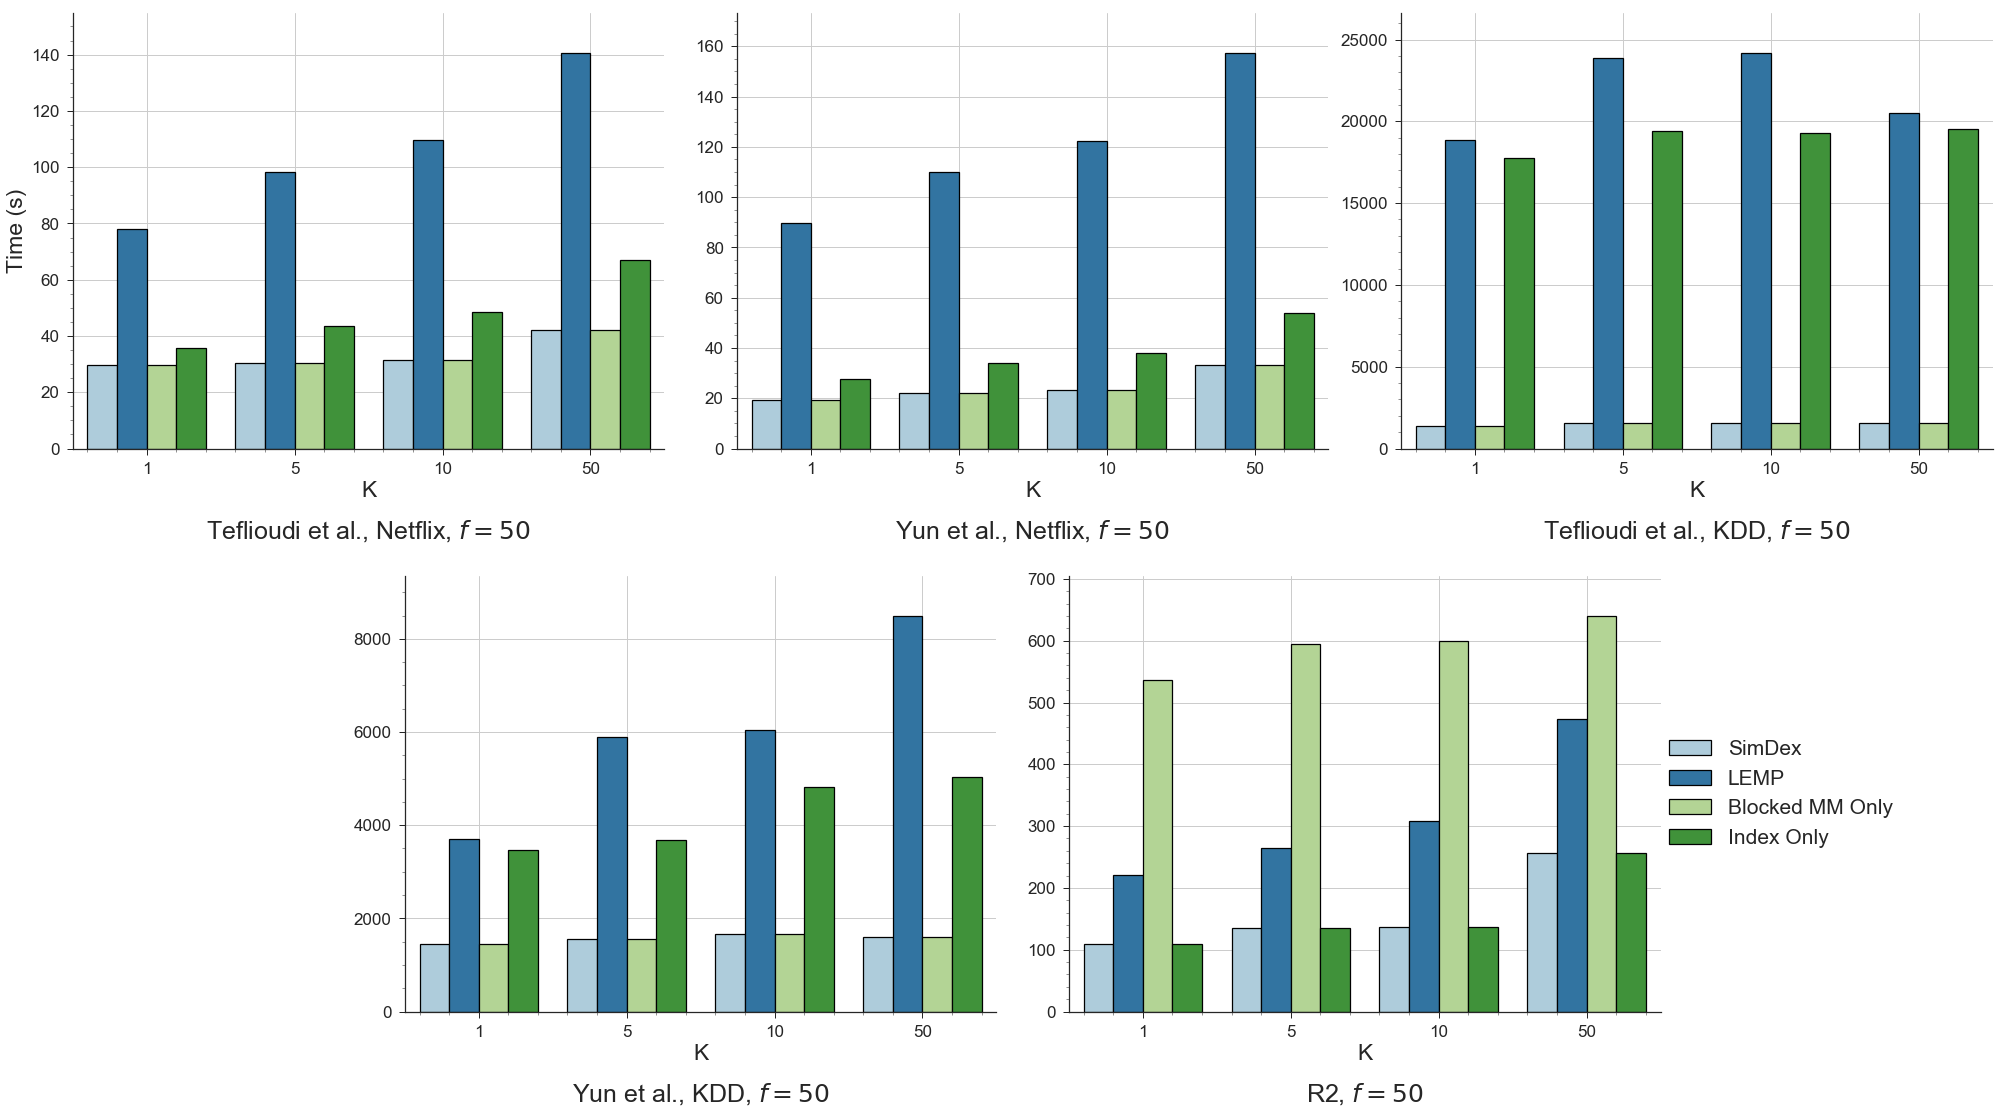

In [5]:
f_u_plots(simdex_df, lemp_df, blocked_mm_df, GOLD_STANDARD_MODELS)

In [6]:
simdex_netflix_df.sort_values(by='comp_time').groupby(
        ['model', 'K'], as_index=False).first().drop(['num_threads','num_latent_factors',
                                                      'batch_size','sample_percentage','num_iters'], axis=1)

,model,K,num_bins,num_clusters,parse_time,cluster_time,index_time,algo_time,comp_time
0,lemp-paper-Netflix-50,1,10,64,14.44560,0.381941,0.075866,12.449000,12.906800
1,lemp-paper-Netflix-50,5,10,64,14.36760,0.388027,0.077179,18.085900,18.551100
2,lemp-paper-Netflix-50,10,10,128,15.03690,0.534181,0.077652,21.631300,22.243200
3,lemp-paper-Netflix-50,50,10,256,14.77380,1.006030,0.088768,38.466000,39.560800
4,lemp-paper-Netflix-noav-10,1,10,64,3.07329,0.239527,0.044877,4.267160,4.551570
5,lemp-paper-Netflix-noav-10,5,10,64,3.03792,0.247939,0.043075,5.912270,6.203280
6,lemp-paper-Netflix-noav-10,10,10,256,2.85258,0.653420,0.044233,6.352020,7.049670
7,lemp-paper-Netflix-noav-10,50,10,256,2.81998,0.650924,0.044712,12.964800,13.660400
8,lemp-paper-Netflix-noav-100,1,5,64,27.82460,0.555190,0.130063,90.297600,90.982800
9,lemp-paper-Netflix-noav-100,5,5,64,28.40160,0.557975,0.130259,102.605000,103.293000


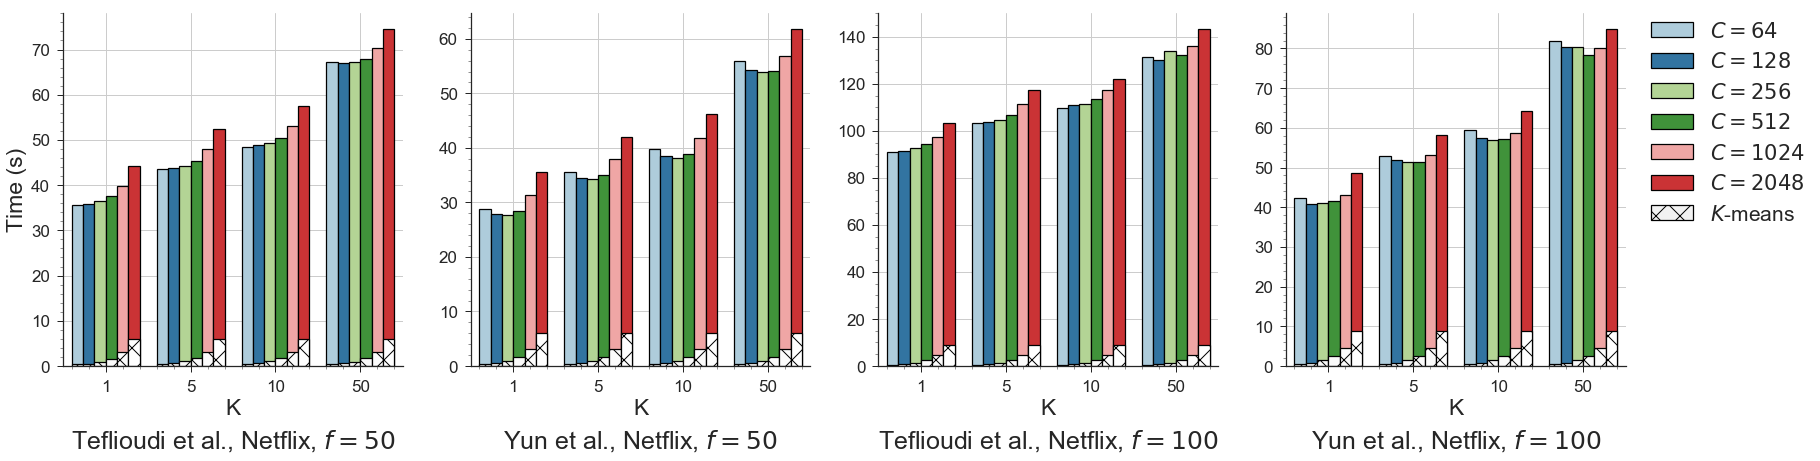

In [7]:
num_clusters_vs_runtime(simdex_netflix_df, NETFLIX_GOLD_STANDARD_MODELS)

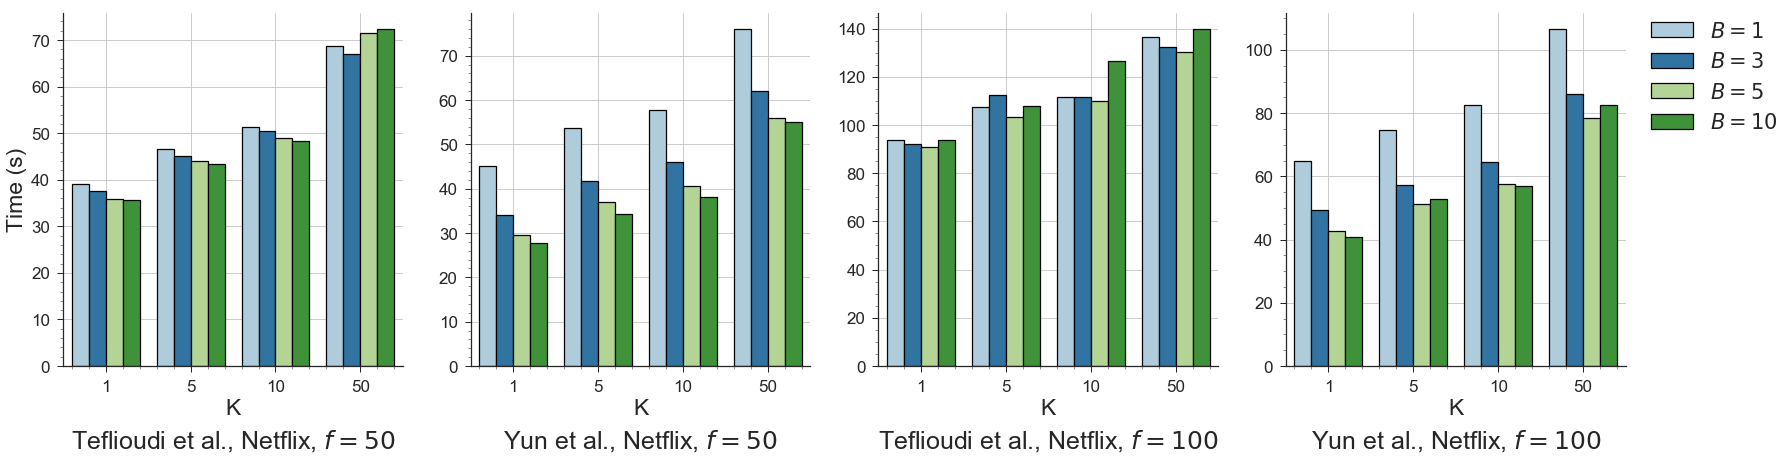

In [8]:
num_bins_vs_runtime(simdex_netflix_df, NETFLIX_GOLD_STANDARD_MODELS)

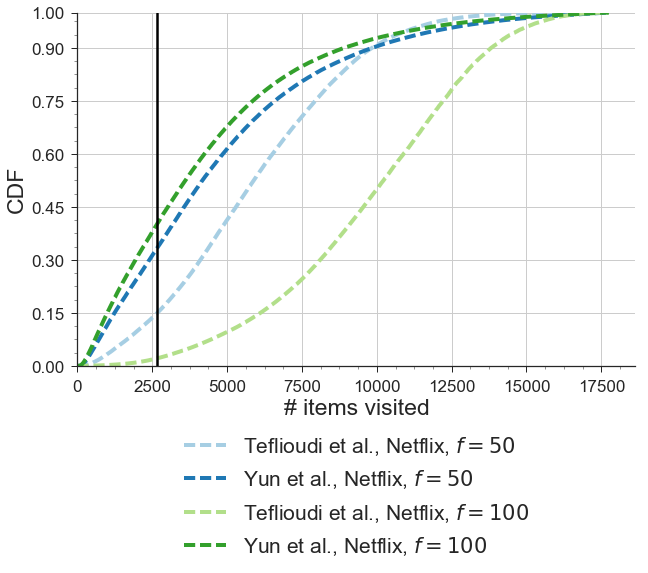

In [9]:
cdf(simdex_netflix_df, blocked_mm_netflix_df, NETFLIX_GOLD_STANDARD_MODELS, 1, x_line=17770*0.15,
    column='num_items_visited', csv_dir='user-stats/K-1', xlabel='# items visited', fname='netflix-items-visited-k-1')

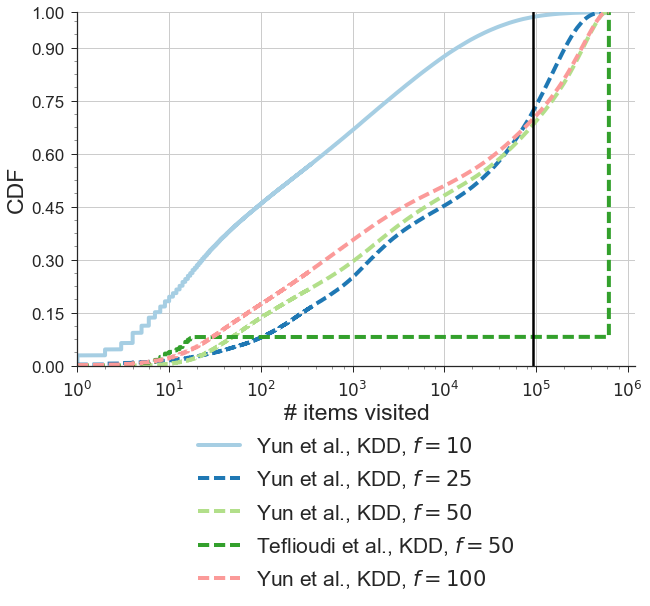

In [10]:
cdf(simdex_kdd_df, blocked_mm_kdd_df, KDD_GOLD_STANDARD_MODELS, 1, x_line=624961*0.15,
    column='num_items_visited', csv_dir='user-stats/K-1', xlabel='# items visited', log=True,
    fname='kdd-items-visited-k-1')

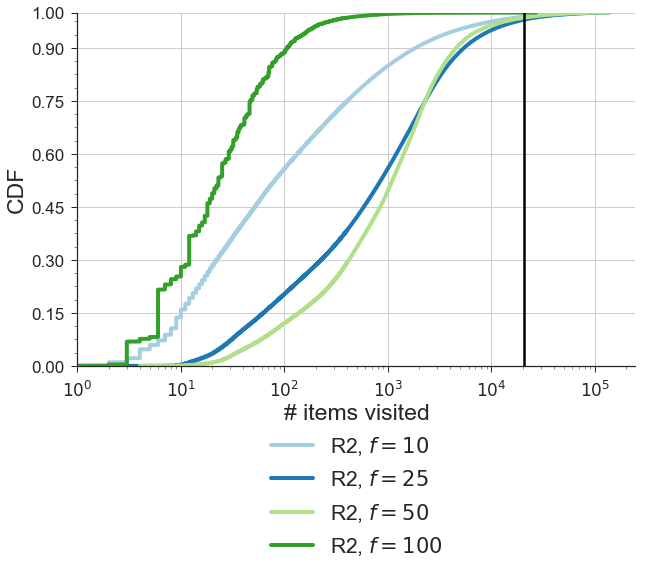

In [11]:
cdf(simdex_r2_df, blocked_mm_r2_df, R2_GOLD_STANDARD_MODELS, 1, x_line=136736*0.15,
    column='num_items_visited', csv_dir='user-stats/K-1', xlabel='# items visited', log=True,
    fname='r2-items-visited-k-1')

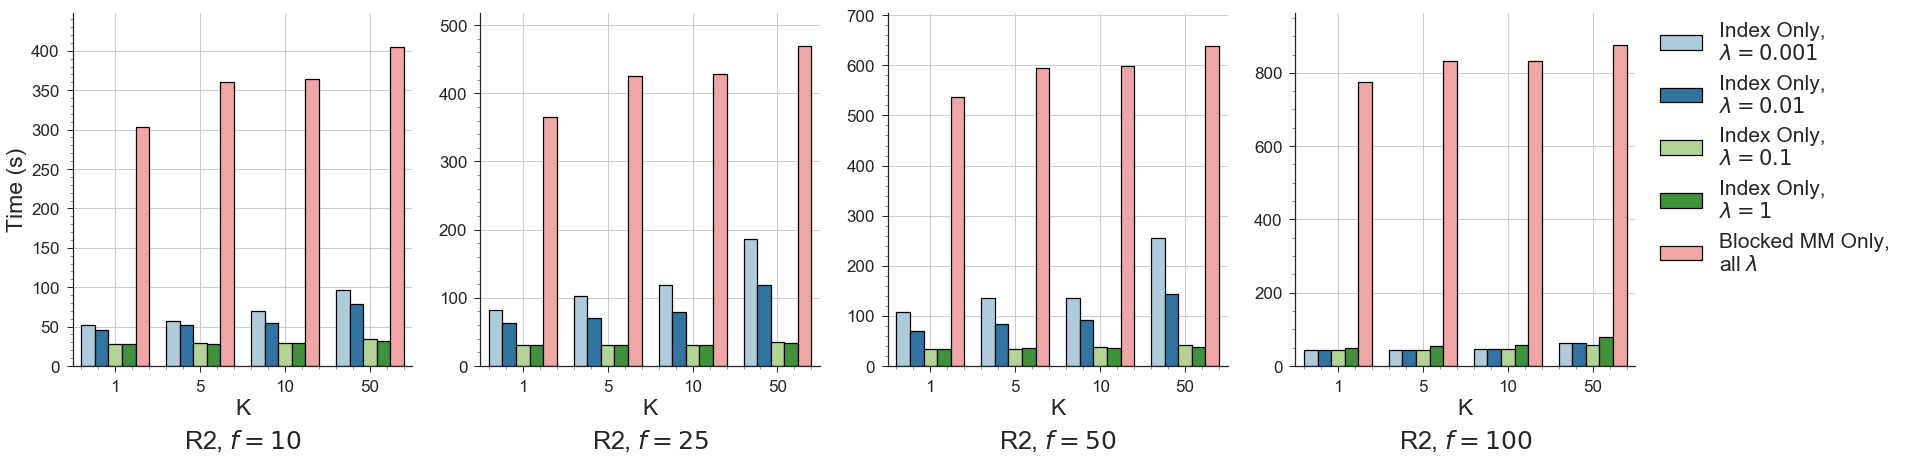

In [12]:
reg_vs_runtime(simdex_r2_df, blocked_mm_r2_df,
               ['nomad-R2-10', 'nomad-R2-25', 'nomad-R2-50', 'nomad-R2-100'], R2_REGS, fname='R2', nrows=1)

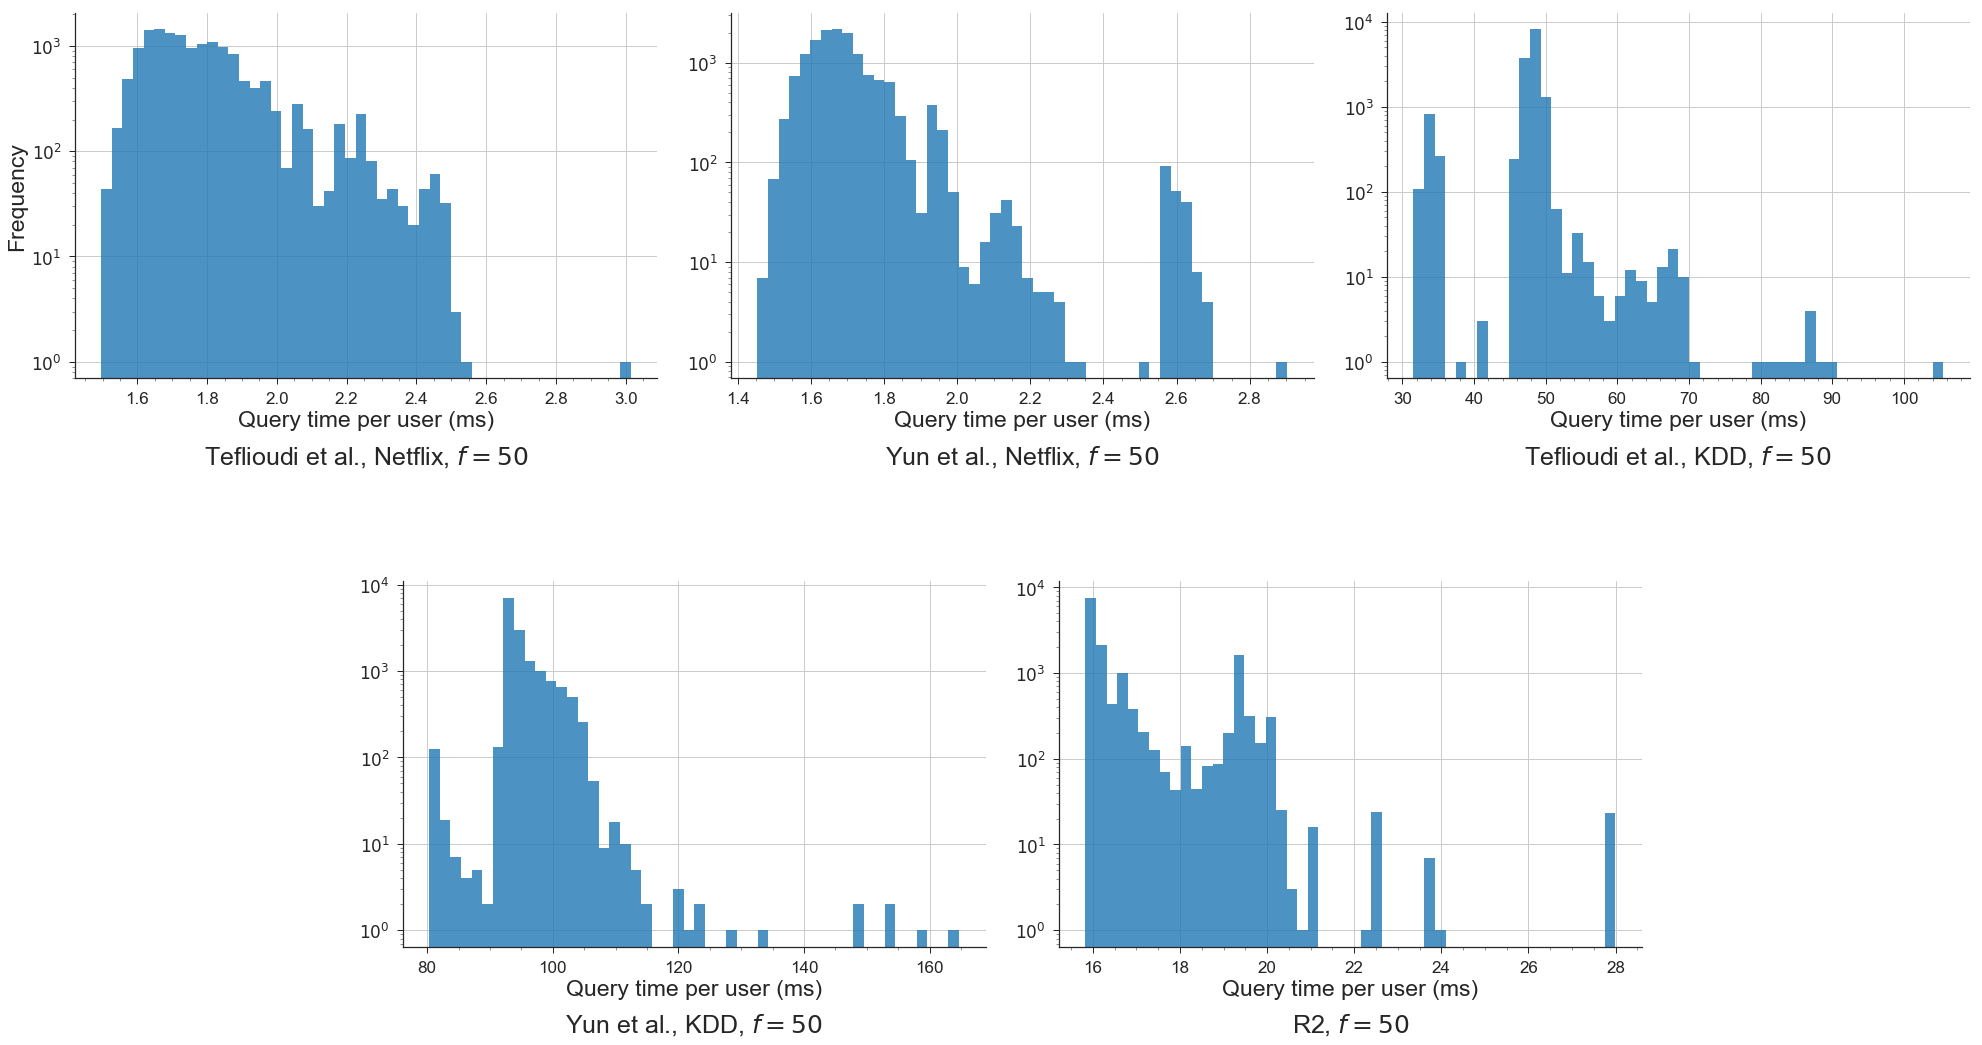

In [13]:
query_time_histogram(GOLD_STANDARD_MODELS, sample_size=15000, bins=50)

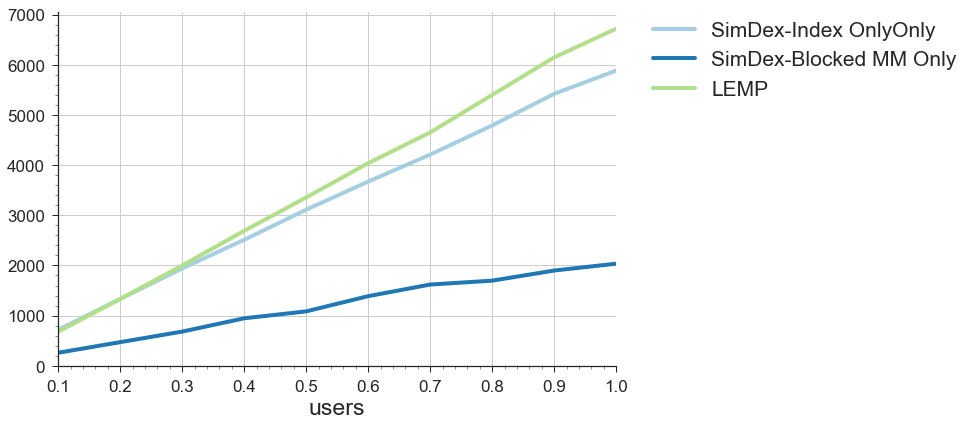

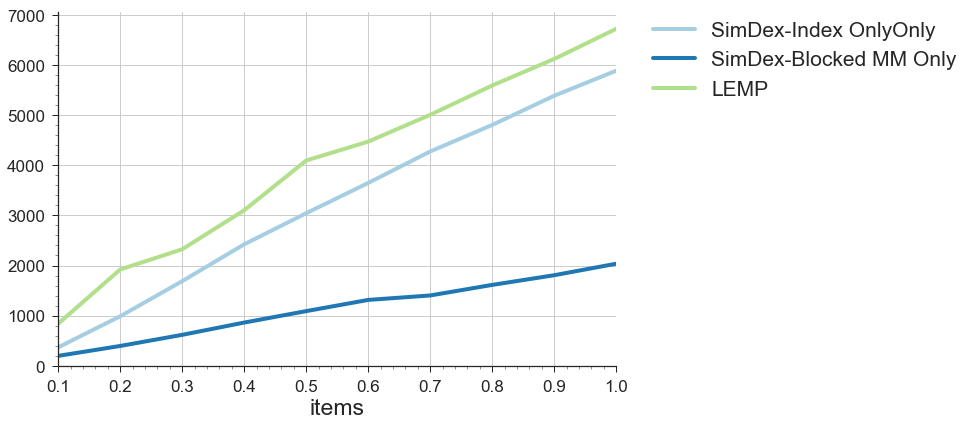

In [14]:
dataset_size_vs_runtime(simdex_interpolation_df, lemp_interpolation_df, blocked_mm_interpolation_df, 'users')
dataset_size_vs_runtime(simdex_interpolation_df, lemp_interpolation_df, blocked_mm_interpolation_df, 'items')